Dan Doan <br>
3/13/2025

Dataset includes:

1. Parent Airline: i.e. International Airlines Group (IAG)
2. Airline: i.e. Iberia, Aer Lingus, British Airways…etc. which are owned by IAG
3. Aircraft Type: Manufacturer & Model
4. Current: Quantity of airplanes in Operation
5. Future: Quantity of airplanes on order, from planespotter.net
6. Order: Quantity airplanes on order, from Wikipedia
7. Unit Cost: Average unit cost ($M) of Aircraft Type, as found by Wikipedia and various google searches
   
8. Total Cost: Current quantity * Unit Cost ($M)
9. Average Age: Average age of "Current" airplanes by "Aircraft Type"

In [1]:
#https://www.kaggle.com/datasets/traceyvanp/airlinefleet

#pd.set_option('display.max_rows', 30000)
#pd.set_option('display.max_rows', 2000)

In [3]:
import pandas as pd
import numpy as np

data_1 = pd.read_csv("/Users/dandoan/Jupyter Notebook/DSC630/Fleet Data.csv")
data = pd.read_excel("/Users/dandoan/Jupyter Notebook/DSC630/Fleet Data Modified.xlsx")
data

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Wizz Air,Antonov An-28,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
28194,Wizz Air,Wizz Air,Antonov An-38,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
28195,Wizz Air,Wizz Air,Antonov An-74-200,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
28196,Wizz Air,Wizz Air,Mil Mi-8MTV-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [5]:
airline_list = data['Airline'].unique()
len(airline_list)

280

In [7]:
len(data['Aircraft Type'].unique())

101

In [31]:
# todo: I will need to "clean" the data or refactor the data to includes all the "Aircraft Type" for each parent airlines 
#       enter as null or empty values


# used for excel modified
#aircraft_list = data['Aircraft Type'].unique()
#aircraft_list

# used for excel modified
#data_new = pd.DataFrame(aircraft_list, columns=['Aircraft Type'])
#data_new

#right_join = pd.merge(df1, df2, on='key', how='right')

# used for excel modifed
#inner_join = pd.merge(data_new, data, on='Aircraft Type', how='inner')
#inner_join

# used for excel modified
#inner_join_unique = inner_join.drop_duplicates(subset=['Aircraft Type'], keep='first')
#inner_join_unique

# used for excel modified
#inner_join_unique_filter = inner_join_unique.drop(['Parent Airline', 'Airline', 'Current', 'Future', 'Historic', 'Total', 'Orders',
#                                                  'Total Cost (Current)', 'Average Age'], axis=1)
#inner_join_unique_filter

#

#data_new

#df_joined = df1.set_index('ID').join(df2[['ID', 'Age']].set_index('ID'), how='left').reset_index()
#data_new_join = data_new.set_index('Aircraft Type').join(data[['Aircraft Type','Unit Cost']].set_index('Aircraft Type'), how='left').reset_index()

#data_new_join

#df2['subreddits'] = [list(set(df['subreddit'].loc[df['author'] == x['author']])) 
#for _, x in df2.iterrows()]


#data_new_join = data_new.apply(lambda x: x['Unit Cost'])


#data_new['Unit Cost'] = [list(set(data['Unit Cost'].loc[data['Aircraft Type'] == x['Aircraft Type']])) 
#                         for_, x in data_new.iterrows()]

#test = list(set(data['Unit Cost'].loc[data['Aircraft Type'] == x['Aircraft Type']])) 

#            for_, x in data_new.iterrows()

In [11]:
# used to modified excel doc
#parent_airline_data = pd.DataFrame(data['Parent Airline'].unique(), columns=['Parent Airline'])
#parent_airline_data


In [9]:
#airline_list
airline_data = pd.DataFrame(data['Airline'].unique(), columns=['Airline'])
airline_data
#len(airline_data)

,Airline
0,Aegean Airlines
1,Olympic Air
2,Aeroflot
3,Rossiya Airlines
4,Aurora Airlines
...,...
275,Virgin Samoa
276,Volaris
277,WestJet
278,WestJet Encore


In [43]:
#test_again = data.groupby(['Parent Airline'])
#test_again

#filter = pd.DataFrame(test_again, columns=['Parent Airline', 'Aircraft Type'])
#filter


#inner_join_two = pd.merge(parent_airline_data, data, on='Parent Airline', how='inner')
#inner_join_two = pd.merge(airline_data, data, on='Airline', how='inner')
#inner_join_two


#inner_join_unique

# this is used for excel modified as well
# I need this for filter below, ???
#inner_join_two_filter = inner_join_unique.drop(['Current', 'Future', 'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)', 'Average Age'], axis=1)

#inner_join_two_filter

#columns_titles = ["Airline", "Aircraft Type"]
#inner_join_two_filter = inner_join_two_filter.reindex(columns=columns_titles)

##inner_join_two_filter[['Parent Airline', 'Aircraft Type']] = inner_join_two_filter[['Aircraft Type', 'Parent Airline']]

#inner_join_two_filter

In [13]:
#len(inner_join_two_filter)
#len(inner_join_two)

In [17]:
# filter 1 out of 280 airlines
#inner_join_two_filter_filtered = inner_join_two[inner_join_two['Airline'] == "Wizz Air"]

#inner_join_two_filter_filtered



In [19]:
# https://www.kdnuggets.com/2019/11/set-operations-applied-pandas-dataframes.html
# filter aircraft type for each Parent Airline that doesn't have
#python_only = inner_join_unique_filter[inner_join_two_filter["Aircraft Type"].isin(inner_join_two_filter_filtered["Aircraft Type"]) == False]

#len(python_only)

#python_only.fillna(0)



In [21]:
#len(python_only)

In [45]:
# this is where my data visualizations comes in 

In [23]:
data

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Wizz Air,Antonov An-28,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
28194,Wizz Air,Wizz Air,Antonov An-38,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
28195,Wizz Air,Wizz Air,Antonov An-74-200,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
28196,Wizz Air,Wizz Air,Mil Mi-8MTV-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [25]:
data.columns

Index(['Parent Airline', 'Airline', 'Aircraft Type', 'Current', 'Future',
       'Historic', 'Total', 'Orders', 'Unit Cost', 'Total Cost (Current)',
       'Average Age'],
      dtype='object')

In [27]:
# trying to replace a dollar sign symbol?
data['Total Cost (Current)'] = data['Total Cost (Current)'].replace({'\$': '', ',': ''}, regex=True)


#data['Total Cost (Current)'] = pd.to_numeric(data['Total Cost (Current)'])


In [29]:
data

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Wizz Air,Antonov An-28,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
28194,Wizz Air,Wizz Air,Antonov An-38,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
28195,Wizz Air,Wizz Air,Antonov An-74-200,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
28196,Wizz Air,Wizz Air,Mil Mi-8MTV-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [31]:
test = data.groupby(['Parent Airline', 'Aircraft Type'])['Total Cost (Current)'].sum()
#test.keys
#test["Aegean Airlines"]
test

Parent Airline   Aircraft Type                  
Aegean Airlines  ATR 42-300F/-320F                   0.0
                 ATR 42-600                          0.0
                 ATR 42/72                          44.0
                 ATR 72-200F                         0.0
                 ATR 72-600                          0.0
                                                    ... 
easyJet          Tupolev Tu-154                      0.0
                 Tupolev Tu-204                      0.0
                 Tupolev Tu-214                      0.0
                 Viking Air DHC 6-400 Twin Otter     0.0
                 Yakovlev Yak-42                     0.0
Name: Total Cost (Current), Length: 11725, dtype: float64

In [33]:
# to incoproate average age column
#test2 = data.groupby(['Airline', 'Aircraft Type'])['Total Cost (Current)'].sum()
test2 = data.groupby(['Airline', 'Aircraft Type'])['Average Age'].sum()
test2

Airline                Aircraft Type                  
ABX Air                ATR 42-300F/-320F                  0.0
                       ATR 42-600                         0.0
                       ATR 42/72                          0.0
                       ATR 72-200F                        0.0
                       ATR 72-600                         0.0
                                                         ... 
easyJet - Switzerland  Tupolev Tu-154                     0.0
                       Tupolev Tu-204                     0.0
                       Tupolev Tu-214                     0.0
                       Viking Air DHC 6-400 Twin Otter    0.0
                       Yakovlev Yak-42                    0.0
Name: Average Age, Length: 28188, dtype: float64

In [37]:
#data["Aircraft Type"]
aircraft_type_list = data['Aircraft Type'].values.tolist()
#aircraft_type_list


In [39]:
# problem before showing data discrepency due to not filtering between parent airline and airline
# need to use test2 instead of test variable where is group by with the average age sum

#test2["Aegean Airlines"]

test2["Olympic Air"]


Aircraft Type
ATR 42-300F/-320F                  0.0
ATR 42-600                         0.0
ATR 42/72                          2.4
ATR 72-200F                        0.0
ATR 72-600                         0.0
                                  ... 
Tupolev Tu-154                     0.0
Tupolev Tu-204                     0.0
Tupolev Tu-214                     0.0
Viking Air DHC 6-400 Twin Otter    0.0
Yakovlev Yak-42                    0.0
Name: Average Age, Length: 101, dtype: float64

In [41]:
test2["easyJet"]

Aircraft Type
ATR 42-300F/-320F                  0.0
ATR 42-600                         0.0
ATR 42/72                          0.0
ATR 72-200F                        0.0
ATR 72-600                         0.0
                                  ... 
Tupolev Tu-154                     0.0
Tupolev Tu-204                     0.0
Tupolev Tu-214                     0.0
Viking Air DHC 6-400 Twin Otter    0.0
Yakovlev Yak-42                    0.0
Name: Average Age, Length: 101, dtype: float64

In [43]:
# TO DO: I will use this and add the remaining leftovers
#modifed_aircraft_type_list = ['ATR 42/72', 'Airbus A319', 'Airbus A320', 'Airbus A321', 'Boeing 737', 'British Aerospace BAe 146/Avro RJ',
#                             'De Havilland Canada DHC-8 Dash 8', 'Airbus A319', 'Airbus A320', 'Airbus A321', 'Boeing 737', 'Boeing 757']



modified_aircraft_type_list = test2["easyJet"].keys()
modified_aircraft_type_list

Index(['ATR 42-300F/-320F', 'ATR 42-600', 'ATR 42/72', 'ATR 72-200F',
       'ATR 72-600', 'Airbus A300', 'Airbus A310', 'Airbus A318',
       'Airbus A319', 'Airbus A320',
       ...
       'Q400 NextGen', 'Saab 2000', 'Saab 340', 'Sukhoi Superjet 100',
       'Tupolev Tu-134', 'Tupolev Tu-154', 'Tupolev Tu-204', 'Tupolev Tu-214',
       'Viking Air DHC 6-400 Twin Otter', 'Yakovlev Yak-42'],
      dtype='object', name='Aircraft Type', length=101)

In [45]:
# I can't used this since it is not correct standard x axis format
#aircraft_list = data['Aircraft Type'].unique()
#aircraft_list

aircraft_type_list_2 = data['Aircraft Type'].unique()
aircraft_type_list_2_sort = aircraft_type_list_2.sort()

aircraft_type_list_2_sort

#aircraft_type_list_2_sorted = data.sort_values(by='Aircraft Type', ascending=False)
#aircraft_type_list_2_sorted = []
#aircraft_type_list_2_sorted

In [47]:
airline_data

,Airline
0,Aegean Airlines
1,Olympic Air
2,Aeroflot
3,Rossiya Airlines
4,Aurora Airlines
...,...
275,Virgin Samoa
276,Volaris
277,WestJet
278,WestJet Encore


In [49]:
airline_data_sort = airline_data.sort_values(by='Airline', ascending=True)

airline_data_sort_array = airline_data_sort.values.tolist()

#airline_data_sort_array

####for item in airline_data_sort_array:
####    print(item)

#for index, row in airline_data.iterrows():
#    print(f"Index: {index}")
#    print(f"col1: {row['Airline']}")

In [51]:
modified_aircraft_type_list

Index(['ATR 42-300F/-320F', 'ATR 42-600', 'ATR 42/72', 'ATR 72-200F',
       'ATR 72-600', 'Airbus A300', 'Airbus A310', 'Airbus A318',
       'Airbus A319', 'Airbus A320',
       ...
       'Q400 NextGen', 'Saab 2000', 'Saab 340', 'Sukhoi Superjet 100',
       'Tupolev Tu-134', 'Tupolev Tu-154', 'Tupolev Tu-204', 'Tupolev Tu-214',
       'Viking Air DHC 6-400 Twin Otter', 'Yakovlev Yak-42'],
      dtype='object', name='Aircraft Type', length=101)

In [53]:
#airline_data_sort_array

In [55]:
#test2['ABX Air']

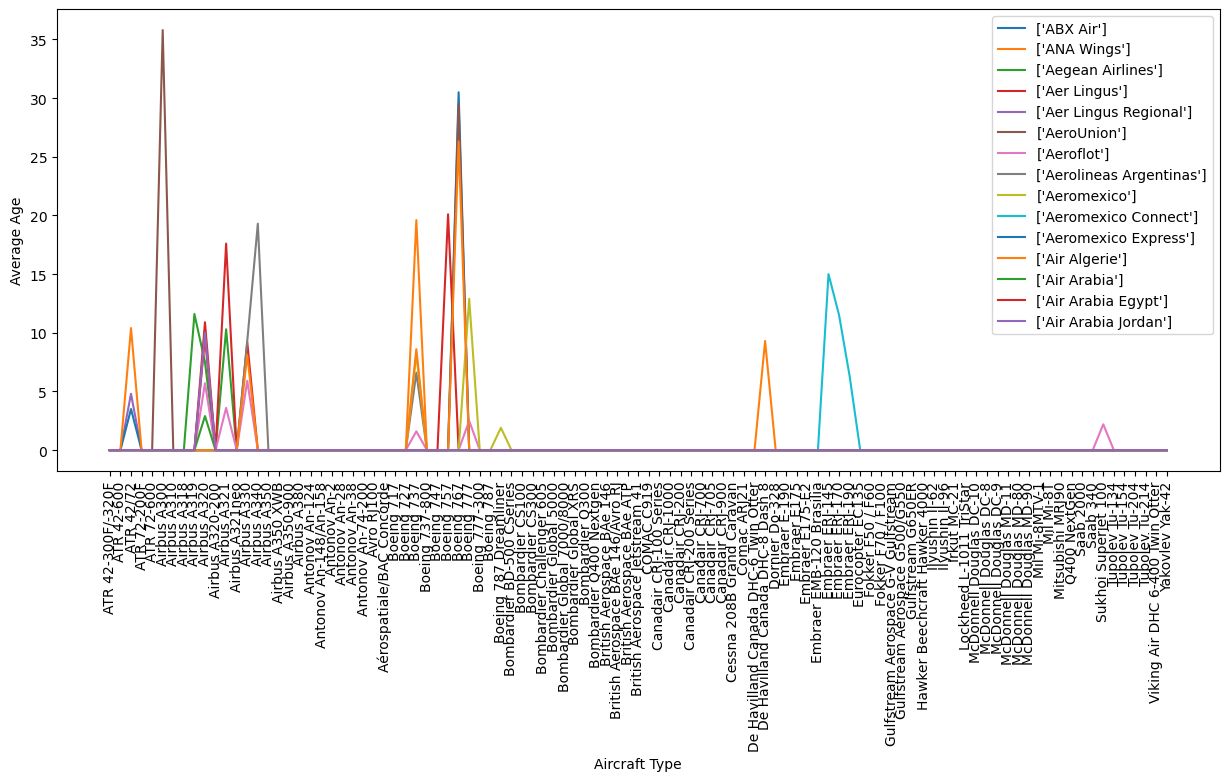

In [57]:
import matplotlib.pyplot as plt

# adjust before plotting
plt.figure(figsize=(15,6))

# To do: I need to figure out how to input missing aircraft for each parent airline as zero or empty
#        REFER TO "cleaning(includes adding as well)" data above
# TO DO IS ALREADY DONE!!!

#for index, row in airline_data.iterrows():
    #plt.plot(modified_aircraft_type_list, test2[row['Airline']], label=row['Airline'])
    #print({row['Airline']})
count = 0
for item in airline_data_sort_array:
    #print(item)
    plt.plot(modified_aircraft_type_list, test2[item], label=item)
    count = count + 1

    if count == 15:
        break

#plt.plot(modified_aircraft_type_list, test2["easyJet"], label='Easy Jet Airline')
#plt.plot(data['Parent Airline'], test["easyJet"], label='easyJet')

# this is not feasible!
plt.xlabel('Aircraft Type')
plt.xticks(rotation='vertical')
#plt.ylabel('Total Cost (Current)')
plt.ylabel('Average Age')
plt.title('')
#plt.figure(figsize=(20, 4))
plt.legend()
plt.show()

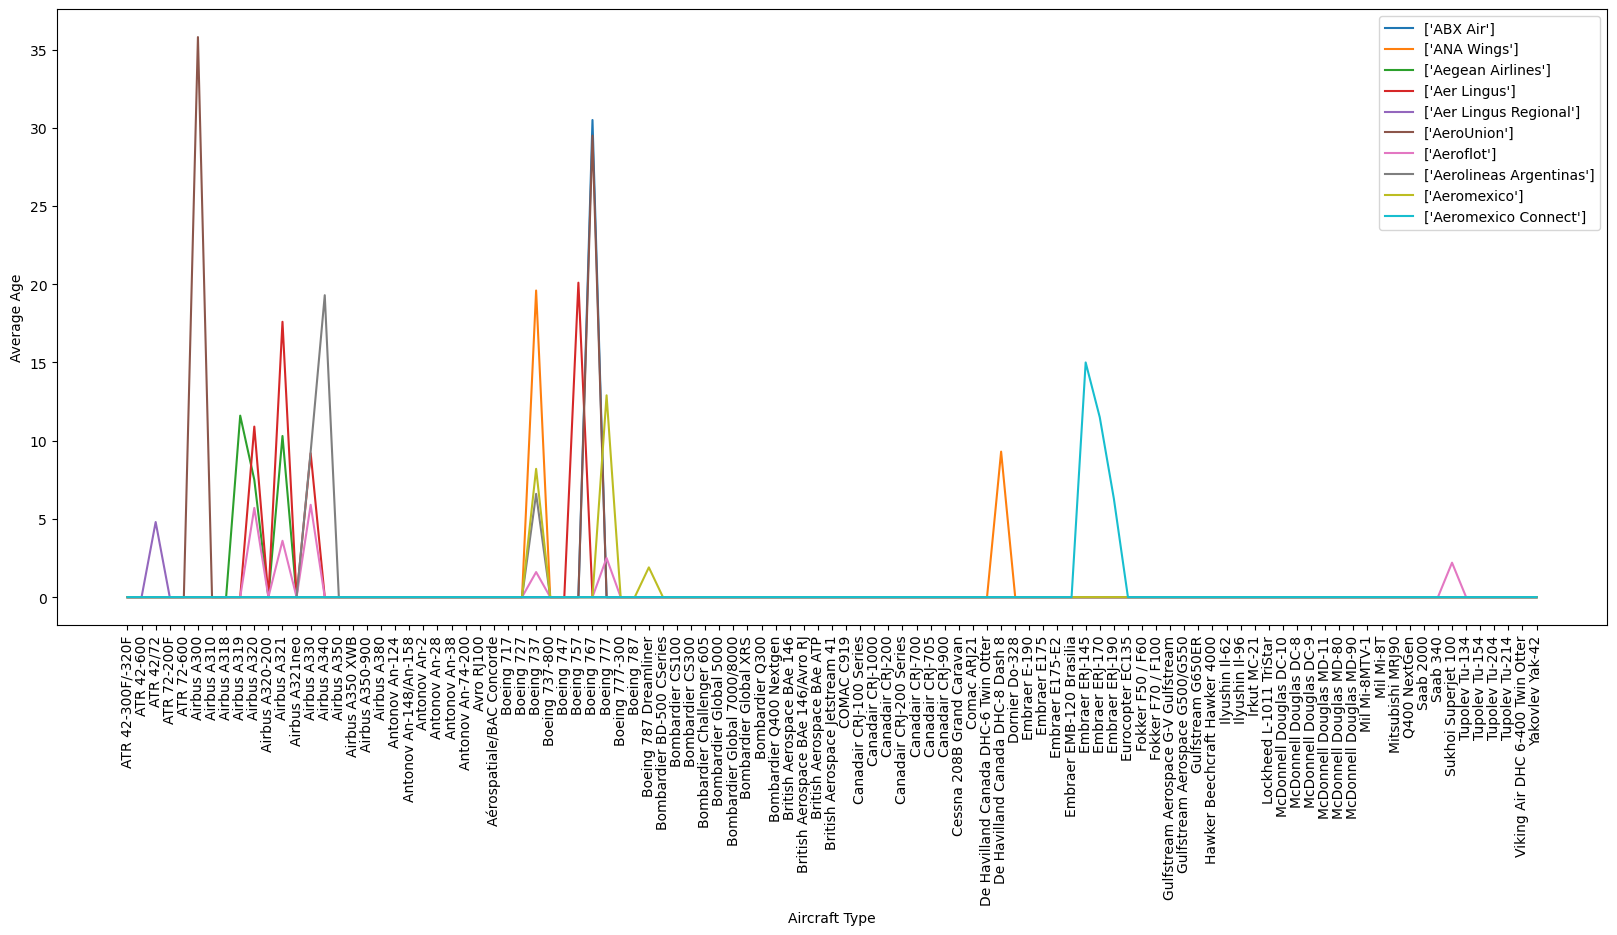

In [257]:
import matplotlib.pyplot as plt

# adjust before plotting
plt.figure(figsize=(20, 8))

count = 0
for item in airline_data_sort_array:
    #print(item)
    plt.plot(modified_aircraft_type_list, test2[item], label=item)
    count = count + 1

    if count == 10:
        break
# this is not feasible as well!        
plt.xlabel('Aircraft Type')
plt.xticks(rotation='vertical')
#plt.ylabel('Total Cost (Current)')
plt.ylabel('Average Age')
plt.title('')
plt.legend()
plt.show()



    Note: This is where I have to redo my entire approach from supervised learning to unsupervised learning instead for the entire milestone or milestone 3. 

In [39]:
data

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,NaN,3.0,4.0,NaN,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,NaN,NaN,8.0,8.0,NaN,90.0,0.0,NaN
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,NaN,3.0,41.0,NaN,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,NaN,NaN,9.0,9.0,NaN,98.0,0.0,NaN
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,NaN,NaN,8.0,NaN,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Wizz Air,Antonov An-28,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
28194,Wizz Air,Wizz Air,Antonov An-38,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
28195,Wizz Air,Wizz Air,Antonov An-74-200,NaN,NaN,NaN,NaN,NaN,19.0,NaN,NaN
28196,Wizz Air,Wizz Air,Mil Mi-8MTV-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [41]:
# Fill data frame  nan values with 0
data_filled = data.fillna(0)
data_filled

,Parent Airline,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,1.0,0.0,3.0,4.0,0.0,90.0,90.0,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,0.0,0.0,8.0,8.0,0.0,90.0,0.0,0.0
2,Aegean Airlines,Aegean Airlines,Airbus A320,38.0,0.0,3.0,41.0,0.0,98.0,3724.0,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,0.0,0.0,9.0,9.0,0.0,98.0,0.0,0.0
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,0.0,0.0,8.0,0.0,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Wizz Air,Antonov An-28,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
28194,Wizz Air,Wizz Air,Antonov An-38,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
28195,Wizz Air,Wizz Air,Antonov An-74-200,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
28196,Wizz Air,Wizz Air,Mil Mi-8MTV-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# drop Parent Airline column
columns = ["Parent Airline"]

data_filled.drop(columns, inplace=True, axis=1)

data_filled

,Airline,Aircraft Type,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Airbus A319,1.0,0.0,3.0,4.0,0.0,90.0,90.0,11.6
1,Olympic Air,Airbus A319,0.0,0.0,8.0,8.0,0.0,90.0,0.0,0.0
2,Aegean Airlines,Airbus A320,38.0,0.0,3.0,41.0,0.0,98.0,3724.0,7.5
3,Olympic Air,Airbus A320,0.0,0.0,9.0,9.0,0.0,98.0,0.0,0.0
4,Aegean Airlines,Airbus A321,8.0,0.0,0.0,8.0,0.0,115.0,919.0,10.3
...,...,...,...,...,...,...,...,...,...,...
28193,Wizz Air,Antonov An-28,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
28194,Wizz Air,Antonov An-38,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
28195,Wizz Air,Antonov An-74-200,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
28196,Wizz Air,Mil Mi-8MTV-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Convert the categorical columns to dummy variables 

#data_filled_with_dummies = pd.get_dummies(data_filled, drop_first=True) 

#data_filled_with_dummies = pd.get_dummies(data_filled, prefix=None, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

data_filled_with_dummies = pd.get_dummies(data_filled, dtype=int) 

#data_filled_with_dummies


# with parents keep
data_2 = data.fillna(0)
data_with_dummies = pd.get_dummies(data_2, dtype=int)

data_with_dummies

,Current,Future,Historic,Total,Orders,Unit Cost,Total Cost (Current),Average Age,Parent Airline_0,Parent Airline_Aegean Airlines,...,Aircraft Type_Q400 NextGen,Aircraft Type_Saab 2000,Aircraft Type_Saab 340,Aircraft Type_Sukhoi Superjet 100,Aircraft Type_Tupolev Tu-134,Aircraft Type_Tupolev Tu-154,Aircraft Type_Tupolev Tu-204,Aircraft Type_Tupolev Tu-214,Aircraft Type_Viking Air DHC 6-400 Twin Otter,Aircraft Type_Yakovlev Yak-42
0,1.0,0.0,3.0,4.0,0.0,90.0,90.0,11.6,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,8.0,8.0,0.0,90.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,38.0,0.0,3.0,41.0,0.0,98.0,3724.0,7.5,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,9.0,9.0,0.0,98.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.0,0.0,0.0,8.0,0.0,115.0,919.0,10.3,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28193,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
28194,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
28195,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
28196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [354]:
# Apply a standard scalar to the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#data_standardized = scaler.fit_transform(data_filled_with_dummies)
#data_standardized


data_standardized_2 = scaler.fit_transform(data_with_dummies)
data_standardized_2


array([[ 0.03237843, -0.04813318,  0.44126772, ..., -0.09996597,
        -0.09996597, -0.09996597],
       [-0.08850161, -0.04813318,  1.35028916, ..., -0.09996597,
        -0.09996597, -0.09996597],
       [ 4.50493986, -0.04813318,  0.44126772, ..., -0.09996597,
        -0.09996597, -0.09996597],
       ...,
       [-0.08850161, -0.04813318, -0.10414514, ..., -0.09996597,
        -0.09996597, -0.09996597],
       [-0.08850161, -0.04813318, -0.10414514, ..., -0.09996597,
        -0.09996597, -0.09996597],
       [-0.08850161, -0.04813318, -0.10414514, ..., -0.09996597,
        -0.09996597, -0.09996597]])

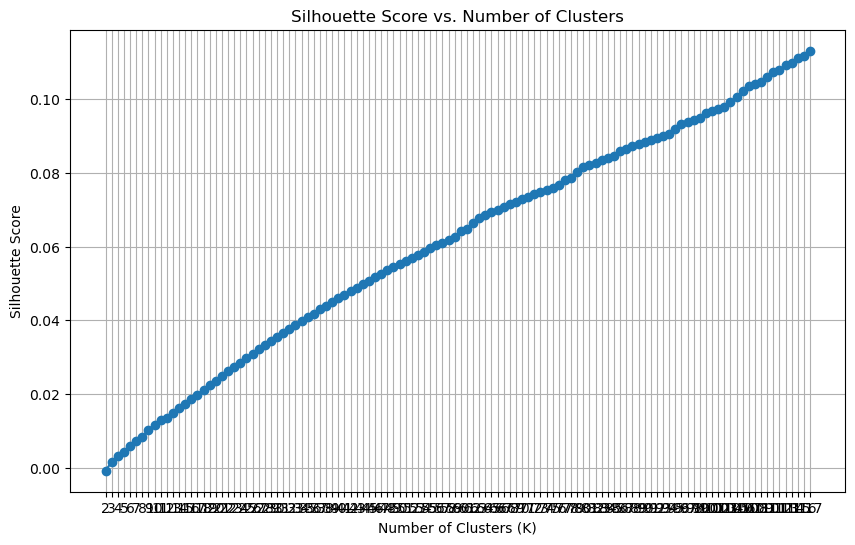

In [376]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate sample data (replace with your actual data)
######X = np.random.rand(100, 2)
X = data_standardized
#X = data_standardized_2

# Range of number of clusters to try
#cluster_range = range(2, 11)
cluster_range = range(2, 118)

# Lists to store silhouette scores
silhouette_scores = []


# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    
    # Fit KMeans and predict clusters
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [318]:
#data_standardized.shape[0]
int((data_standardized.shape[0]//2)**0.5)

118

/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

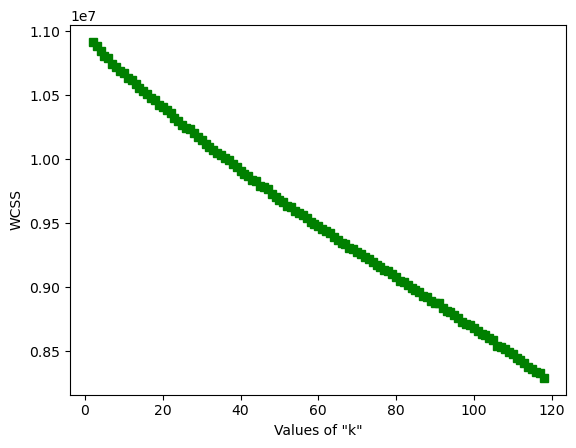

In [322]:

# determining the maximum number of clusters 
# using the simple method
limit = int((data_standardized.shape[0]//2)**0.5)
 
# selecting optimal value of 'k'
# using elbow method
 
# wcss - within cluster sum of
# squared distances
wcss = {}
 
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(data_standardized)
    wcss[k] = model.inertia_
     
# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [370]:
# Fit a K-means model to the data with the optimal number of clusters chosen

#kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0) 
#kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0) 

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0) 

#kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0) 
kmeans.fit(X)



KMeans(n_clusters=4, n_init=10, random_state=0)

In [372]:
# Fit a PCA transformation with two features to the scaled data.

from sklearn.decomposition import PCA


# Apply PCA with 2 components
pca = PCA(n_components=2) 
pca.fit(X)

# Transform the data
pca_data = pca.transform(X)

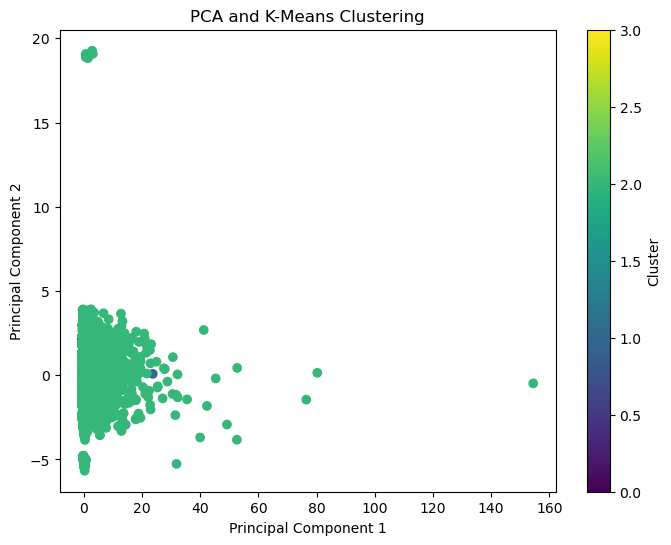

In [374]:
# Make a scatterplot the PCA transformed data coloring each point by its cluster value.


# Visualize 
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.fit(X).labels_.astype(float))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
# Add a colorbar
plt.colorbar(label='Cluster') 

In [49]:
#data_1_dropped.columns

In [175]:
#####data_1_dropped['Total Cost (Current)']

In [62]:
#data_1

In [66]:
#df_sorted = data_1_dropped.sort_values(by='Total', ascending=False)
#df_sorted

In [68]:
#df_sorted_ = data_1_dropped.sort_values(by='Total Cost (Current)', ascending=False)
#df_sorted_

#new_dataframe = pd.DataFrame(data_1_dropped['Total Cost (Current)'].astype(int), columns=['Total Cost (Current)'])
#new_dataframe.sort_values(by='Total Cost (Current)', ascending=False)


#np_array = new_dataframe.to_numpy()

#np_array

    Note: This is where I preprocessed my data or clean my data for my entire data analysis. 

In [51]:
# https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
# https://en.wikipedia.org/wiki/Imputation_(statistics)
# https://stats.stackexchange.com/questions/348787/what-are-possible-reasons-of-clustering-failure


columns_to_remove = ['Current', 'Future', 'Historic', 'Orders']

data_1_dropped = data_1.drop(columns=columns_to_remove)



data_1_dropped['Total'] = data_1_dropped['Total'].fillna(data_1_dropped['Total'].median())

# convert to number
data_1_dropped['Unit Cost'] = data_1_dropped['Unit Cost'].str.replace('$', '', regex=False)
data_1_dropped['Unit Cost'] = data_1_dropped['Unit Cost'].fillna(data_1_dropped['Unit Cost'].median())

# convert to number
data_1_dropped['Total Cost (Current)'] = data_1_dropped['Total Cost (Current)'].str.replace('$', '', regex=False)
data_1_dropped['Total Cost (Current)'] = data_1_dropped['Total Cost (Current)'].str.replace(',', '', regex=False)
data_1_dropped['Total Cost (Current)'] = data_1_dropped['Total Cost (Current)'].fillna(data_1_dropped['Total Cost (Current)'].median())

data_1_dropped['Average Age'] = data_1_dropped['Average Age'].fillna(data_1_dropped['Average Age'].median())




data_1_dropped
#data_1_filled = data_1.fillna(0)

#data_1_filled

,Parent Airline,Airline,Aircraft Type,Total,Unit Cost,Total Cost (Current),Average Age
0,Aegean Airlines,Aegean Airlines,Airbus A319,4.0,90,90,11.6
1,Aegean Airlines,Olympic Air,Airbus A319,8.0,90,0,8.9
2,Aegean Airlines,Aegean Airlines,Airbus A320,41.0,98,3724,7.5
3,Aegean Airlines,Olympic Air,Airbus A320,9.0,98,0,8.9
4,Aegean Airlines,Aegean Airlines,Airbus A321,8.0,115,919,10.3
...,...,...,...,...,...,...,...
1578,WestJet,WestJet,Boeing 757,1.0,73,0,8.9
1579,WestJet,WestJet,Boeing 767,4.0,187,748,24.5
1580,WestJet,WestJet Encore,De Havilland Canada DHC-8 Dash 8,33.0,31,1033,2.0
1581,Wizz Air,Wizz Air,Airbus A320,72.0,98,6174,5.1


In [53]:
#data_1_filled_with_dummies = pd.get_dummies(data_1_filled, dtype=int) 
#data_1_filled_with_dummies

data_1_dropped_with_dummies = pd.get_dummies(data_1_dropped, dtype=int) 
data_1_dropped_with_dummies





,Total,Average Age,Parent Airline_Aegean Airlines,Parent Airline_Aeroflot,Parent Airline_Aerolineas Argentinas,Parent Airline_Air Algerie,Parent Airline_Air Arabia,Parent Airline_Air Astana,Parent Airline_Air Berlin,Parent Airline_Air Canada,...,Total Cost (Current)_96,Total Cost (Current)_960,Total Cost (Current)_9600,Total Cost (Current)_962,Total Cost (Current)_970,Total Cost (Current)_98,Total Cost (Current)_980,Total Cost (Current)_986,Total Cost (Current)_9898,Total Cost (Current)_995
0,4.0,11.6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,8.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41.0,7.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,8.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,10.3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,1.0,8.9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,4.0,24.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1580,33.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1581,72.0,5.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Apply a standard scalar to the data.
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
#data_standardized = scaler.fit_transform(data_filled_with_dummies)
#data_standardized


#data_1_standardized = scaler2.fit_transform(data_1_filled_with_dummies)
#data_1_standardized


data_2_standardized = scaler2.fit_transform(data_1_dropped_with_dummies)
data_2_standardized


array([[-0.44352144,  0.41653653, 12.54192968, ..., -0.02514182,
        -0.02514182, -0.02514182],
       [-0.35518267, -0.12660789, 12.54192968, ..., -0.02514182,
        -0.02514182, -0.02514182],
       [ 0.37361216, -0.40823833, 12.54192968, ..., -0.02514182,
        -0.02514182, -0.02514182],
       ...,
       [ 0.19693462, -1.51464363, -0.07973255, ..., -0.02514182,
        -0.02514182, -0.02514182],
       [ 1.05823761, -0.89103337, -0.07973255, ..., -0.02514182,
        -0.02514182, -0.02514182],
       [-0.20058983, -1.79627407, -0.07973255, ..., -0.02514182,
        -0.02514182, -0.02514182]])

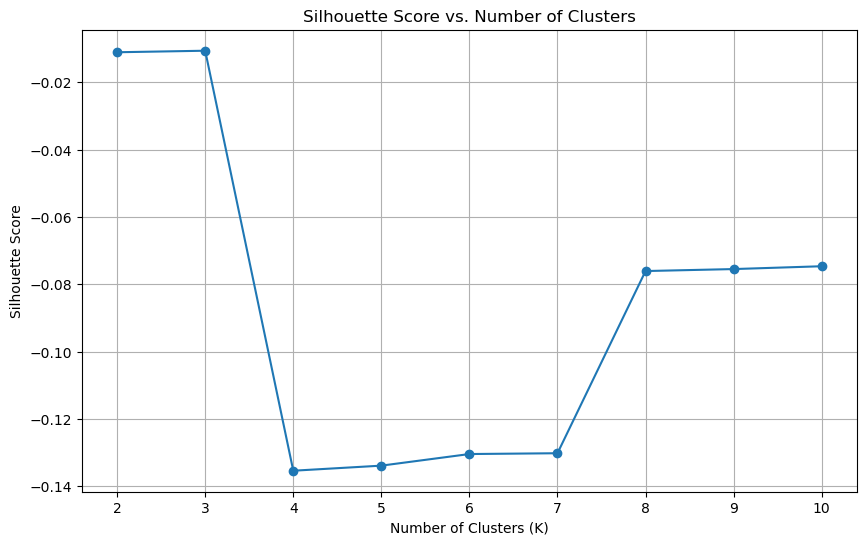

In [57]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate sample data (replace with your actual data)
######X = np.random.rand(100, 2)

X_1 = data_2_standardized
#X_1 = data_1_standardized
#X = data_standardized_2

# Range of number of clusters to try
#cluster_range = range(2, 11)
cluster_range = range(2, 11)

# Lists to store silhouette scores
silhouette_scores = []


# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    
    # Fit KMeans and predict clusters
    cluster_labels = kmeans.fit_predict(X_1)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette score vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [83]:
# Fit a K-means model to the data with the optimal number of clusters chosen

#kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0) 
#kmeans = KMeans(n_clusters=60, init='k-means++', max_iter=300, n_init=10, random_state=0) 

####kmeans2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0) 

#kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0) 

####kmeans2.fit(X_1)



#kmeans3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0) 

#kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) 
#kmeans3 = KMeans(n_clusters=3, init='k-means++', max_iter=800, n_init=10, random_state=0) 
kmeans3 = KMeans(n_clusters=4, init='k-means++', max_iter=2000, n_init=10, random_state=0) 
kmeans3.fit(X_1)

KMeans(max_iter=2000, n_clusters=4, n_init=10, random_state=0)

In [85]:
# Fit a PCA transformation with two features to the scaled data.

from sklearn.decomposition import PCA


# Apply PCA with 2 components
pca2 = PCA(n_components=2) 
pca2.fit(X_1)

# Transform the data
pca_2_data = pca2.transform(X_1)

In [87]:
pca_2_data

array([[-0.06229511, -0.82107017],
       [-0.1817982 , -0.44792366],
       [-0.36635115, -1.11041724],
       ...,
       [-0.35539859,  3.92429054],
       [-0.11656605, -2.82718668],
       [ 0.84973954, -2.63181639]])

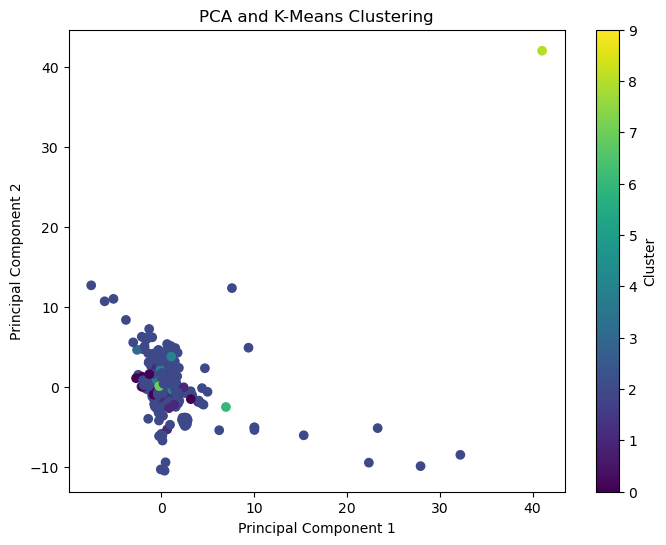

In [89]:
# Make a scatterplot the PCA transformed data coloring each point by its cluster value.


# Visualize 
plt.figure(figsize=(8, 6))
plt.scatter(pca_2_data[:,0], pca_2_data[:,1], c=kmeans.fit(X_1).labels_.astype(float))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
# Add a colorbar
plt.colorbar(label='Cluster') 

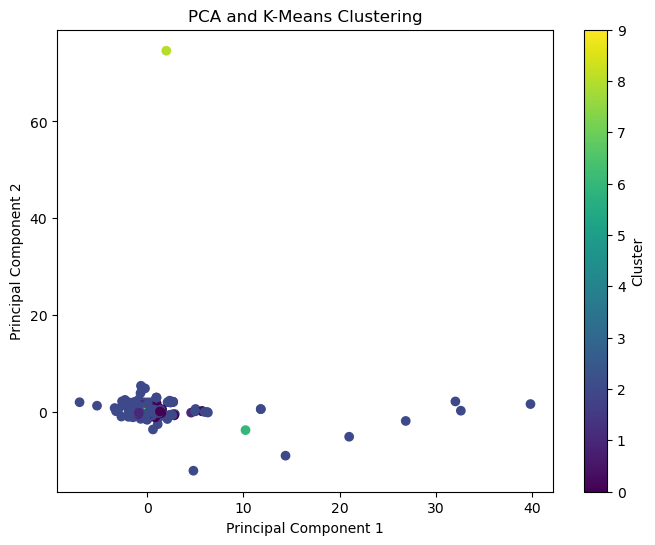

In [211]:
from sklearn.decomposition import PCA

kmeans4 = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0) 
kmeans4.fit(X_1)

# Apply PCA with 2 components
pca3 = PCA(n_components=2) 
pca3.fit(X_1)

# Transform the data
pca_3_data = pca3.transform(X_1)

# Visualize 
plt.figure(figsize=(8, 6))
plt.scatter(pca_3_data[:,0], pca_3_data[:,1], c=kmeans.fit(X_1).labels_.astype(float))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
# Add a colorbar
plt.colorbar(label='Cluster') 


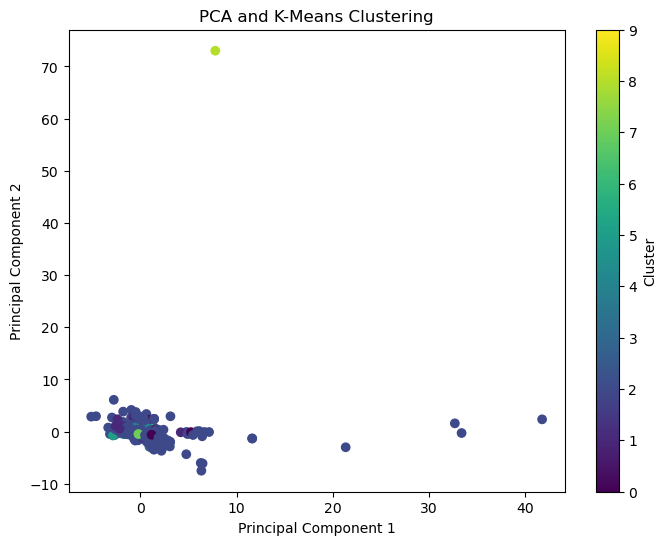

In [213]:
from sklearn.decomposition import PCA

kmeans5 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0) 
kmeans5.fit(X_1)
# Apply PCA with 2 components
pca4 = PCA(n_components=2) 
pca4.fit(X_1)

# Transform the data
pca_4_data = pca4.transform(X_1)

# Visualize 
plt.figure(figsize=(8, 6))
plt.scatter(pca_4_data[:,0], pca_4_data[:,1], c=kmeans.fit(X_1).labels_.astype(float))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-Means Clustering')
# Add a colorbar
plt.colorbar(label='Cluster') 

/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


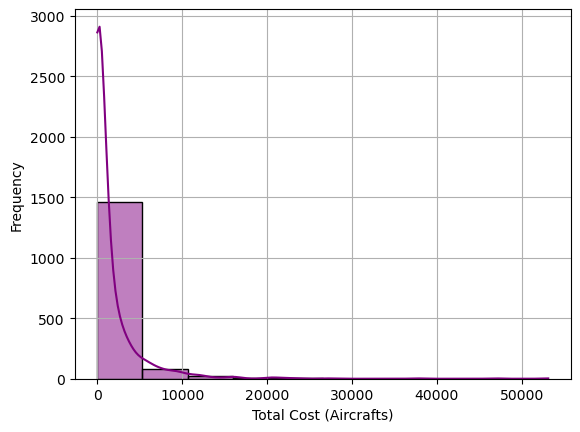

In [203]:
sns.histplot(data_1_dropped['Total Cost (Current)'].astype(int), kde=True, bins=10, color='purple')

# Labels and title
plt.xlabel('Total Cost (Aircrafts)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


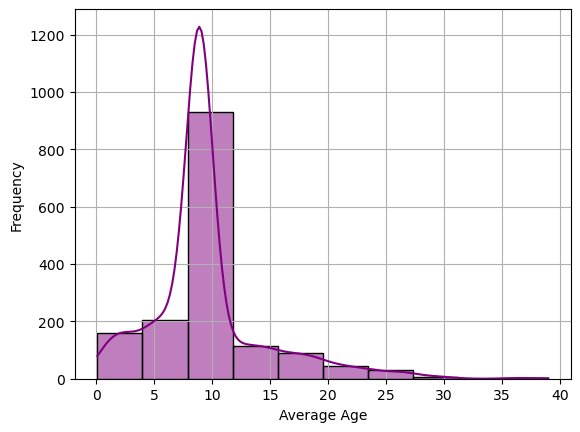

In [195]:
# https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/#
# https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a

import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=1000)

#sns.histplot(data, kde=True, bins=30, color='purple')
sns.histplot(data_1_dropped['Average Age'], kde=True, bins=10, color='purple')

# Labels and title
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


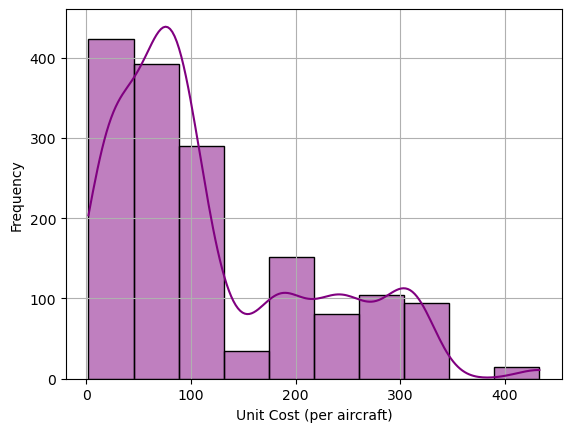

In [201]:
sns.histplot(data_1_dropped['Unit Cost'].astype(int), kde=True, bins=10, color='purple')

# Labels and title
plt.xlabel('Unit Cost (per aircraft)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

/Users/dandoan/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


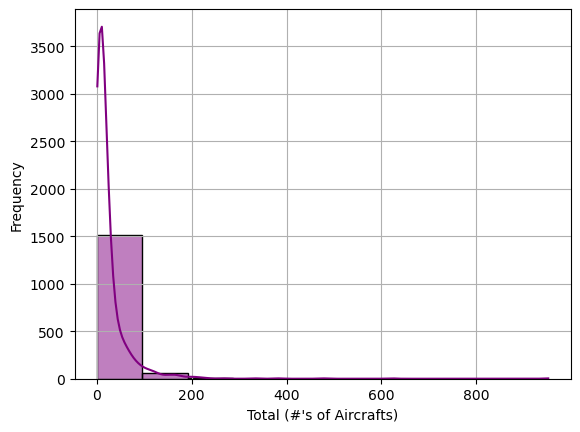

In [209]:
sns.histplot(data_1_dropped['Total'].astype(int), kde=True, bins=10, color='purple')

# Labels and title
plt.xlabel("Total (#'s of Aircrafts)")
plt.ylabel('Frequency')
plt.grid()
plt.show()